In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits

In [2]:
digits=load_digits()

### Exploring Digit DataSet 

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

plt.gray() used to convert colormap to "Gray" &<br>
Observing some predefined images data

plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [10]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

Splitting dataset for training and testing

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [13]:
len(x_train)

1437

In [15]:
len(x_test)

360

##### Creating Logistic Regression Model

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
reg=LogisticRegression()

In [18]:
reg.fit(x_train,y_train)

c:\users\aman asati\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
reg.score(x_test,y_test)

0.9694444444444444

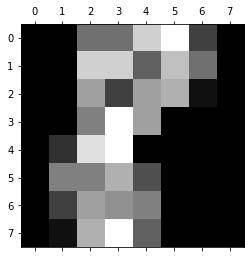

In [23]:
plt.matshow(digits.images[38])

In [24]:
digits.target[38]

8

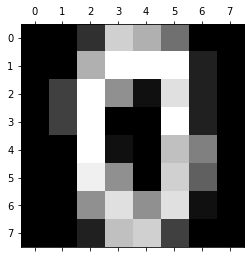

In [25]:
plt.matshow(digits.images[20])

In [26]:
digits.target[20]

0

In [28]:
reg.predict([digits.data[20]])

array([0])

In [29]:
reg.predict([digits.data[38]])

array([8])

both cases predicted correctly✌

But now how to find where our model was laging cause accuracy is less than 1<br>
We will use

#### confusion Matrix😉

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
y_predicted = reg.predict(x_test)

In [33]:
cm = confusion_matrix(y_test,y_predicted)

In [34]:
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 38,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 36,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 35]], dtype=int64)

Ewww!! what the heckk is this.. let's vizualise it in heatmap

In [35]:
import seaborn as sns

Text(69.0, 0.5, 'Truth')

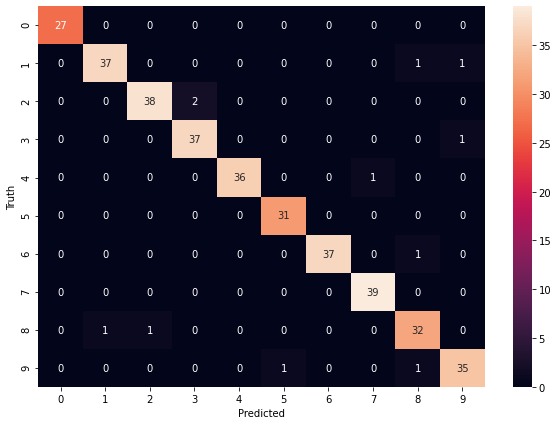

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

This heatmap shows the predicted vs truth value<br>where the model has failed to predict correctly